In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Cargamos el dataset

In [7]:
df= pd.read_csv('./Data/breast-cancer-wisconsin-data_data.csv')
df= df.drop('Unnamed: 32',axis=1)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


miramos como es el dataset y la informacion que nos da

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Comenzamos a modificar el dataset para prepararlo para machine learning

In [10]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x=='B' else 0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
diagnosis,569.0,6.274165e-01,4.839180e-01,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


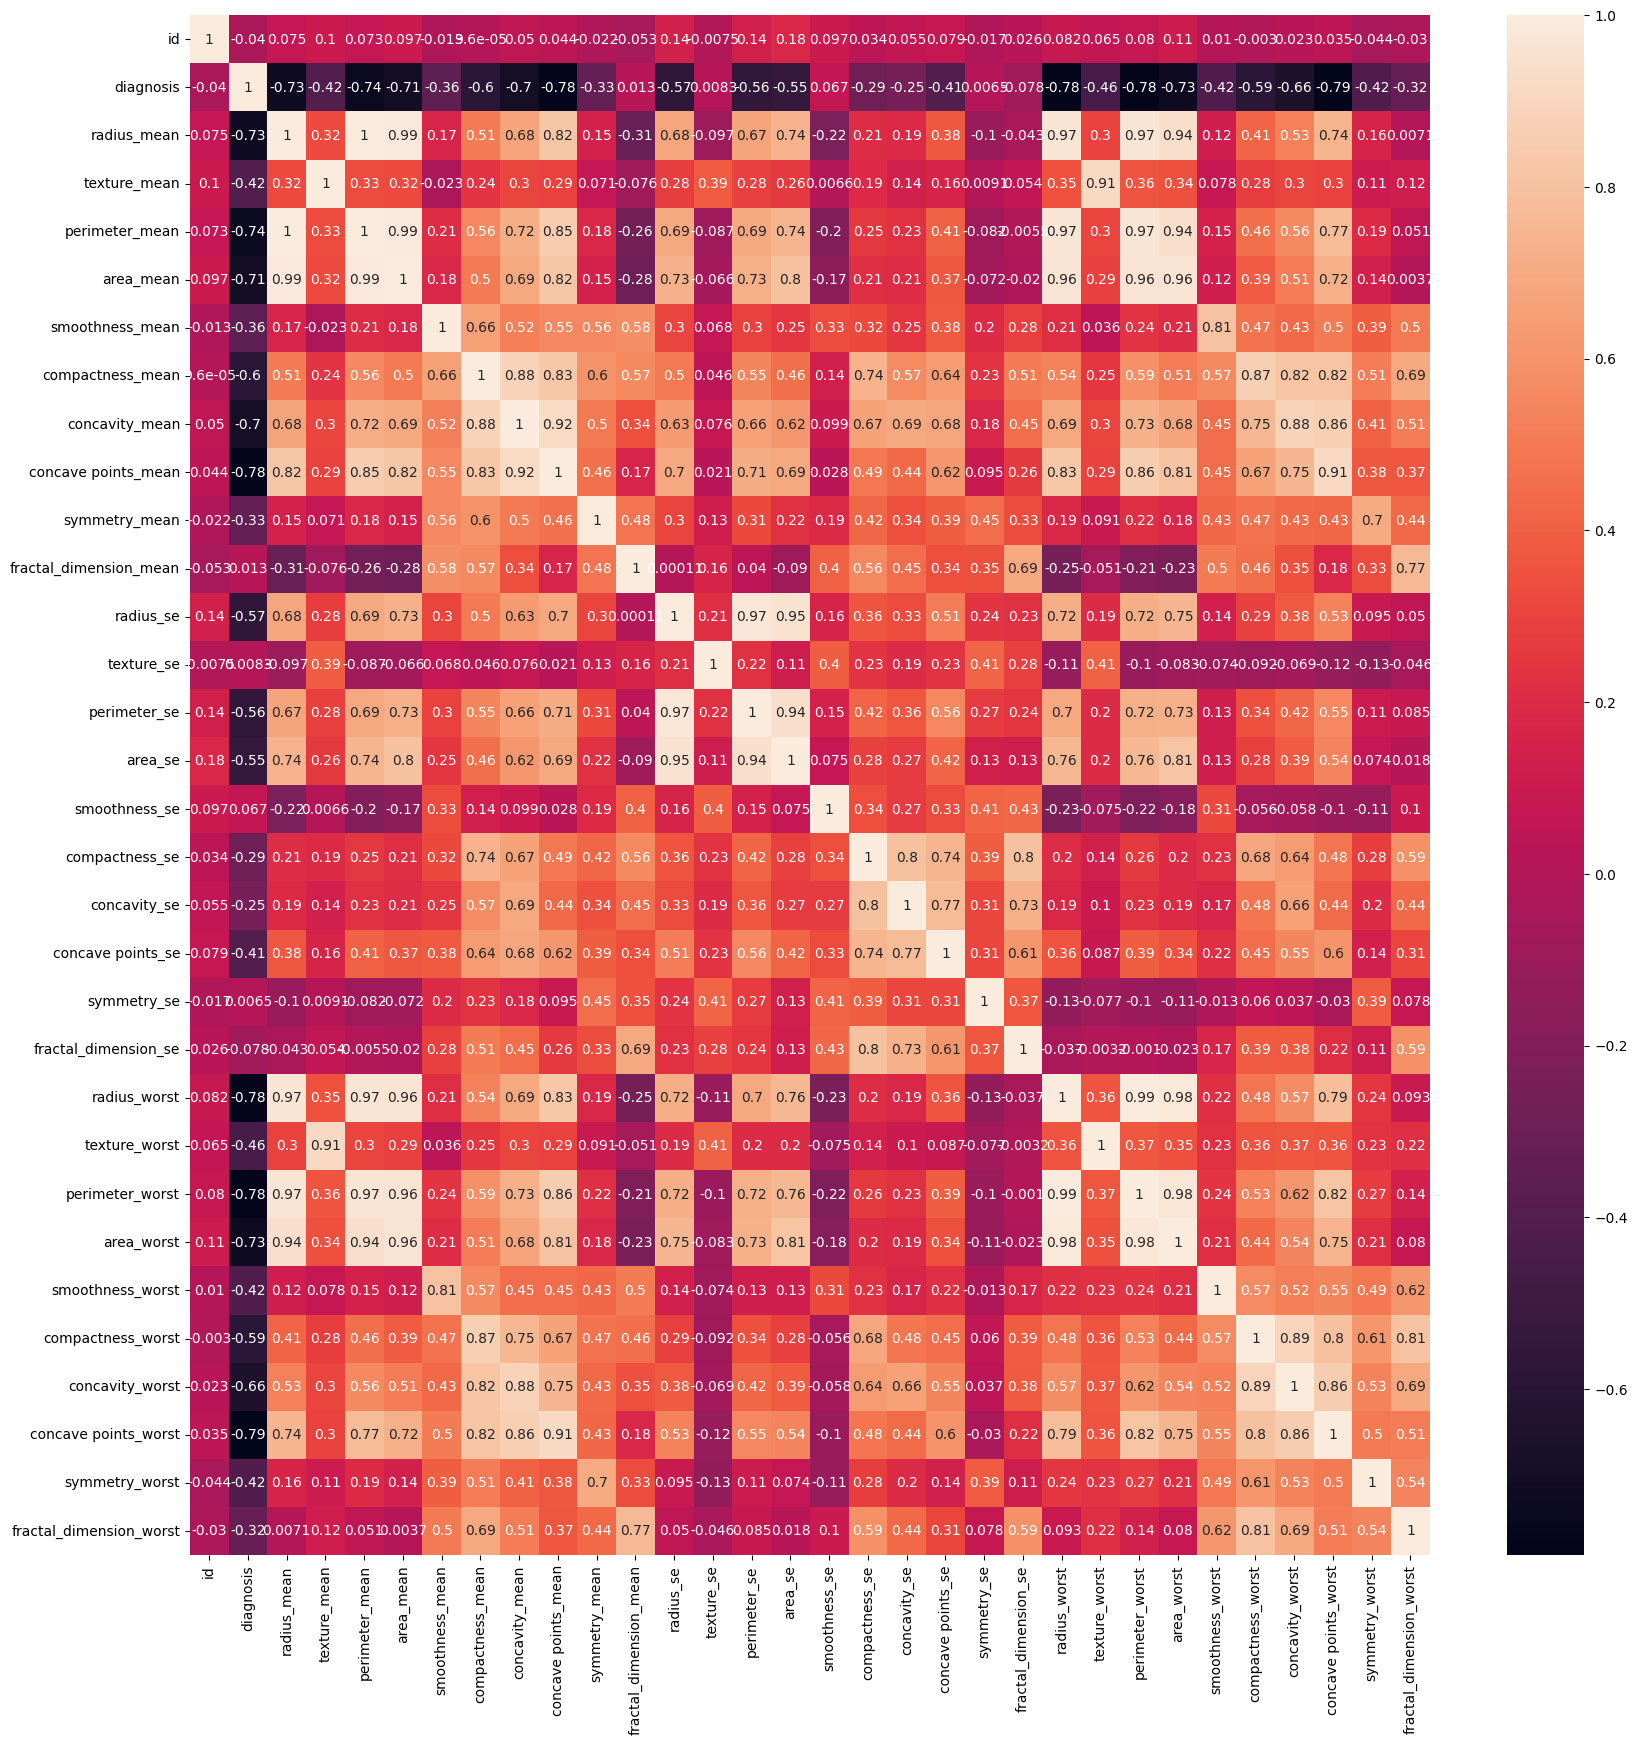

In [13]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(), annot=True);

In [14]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

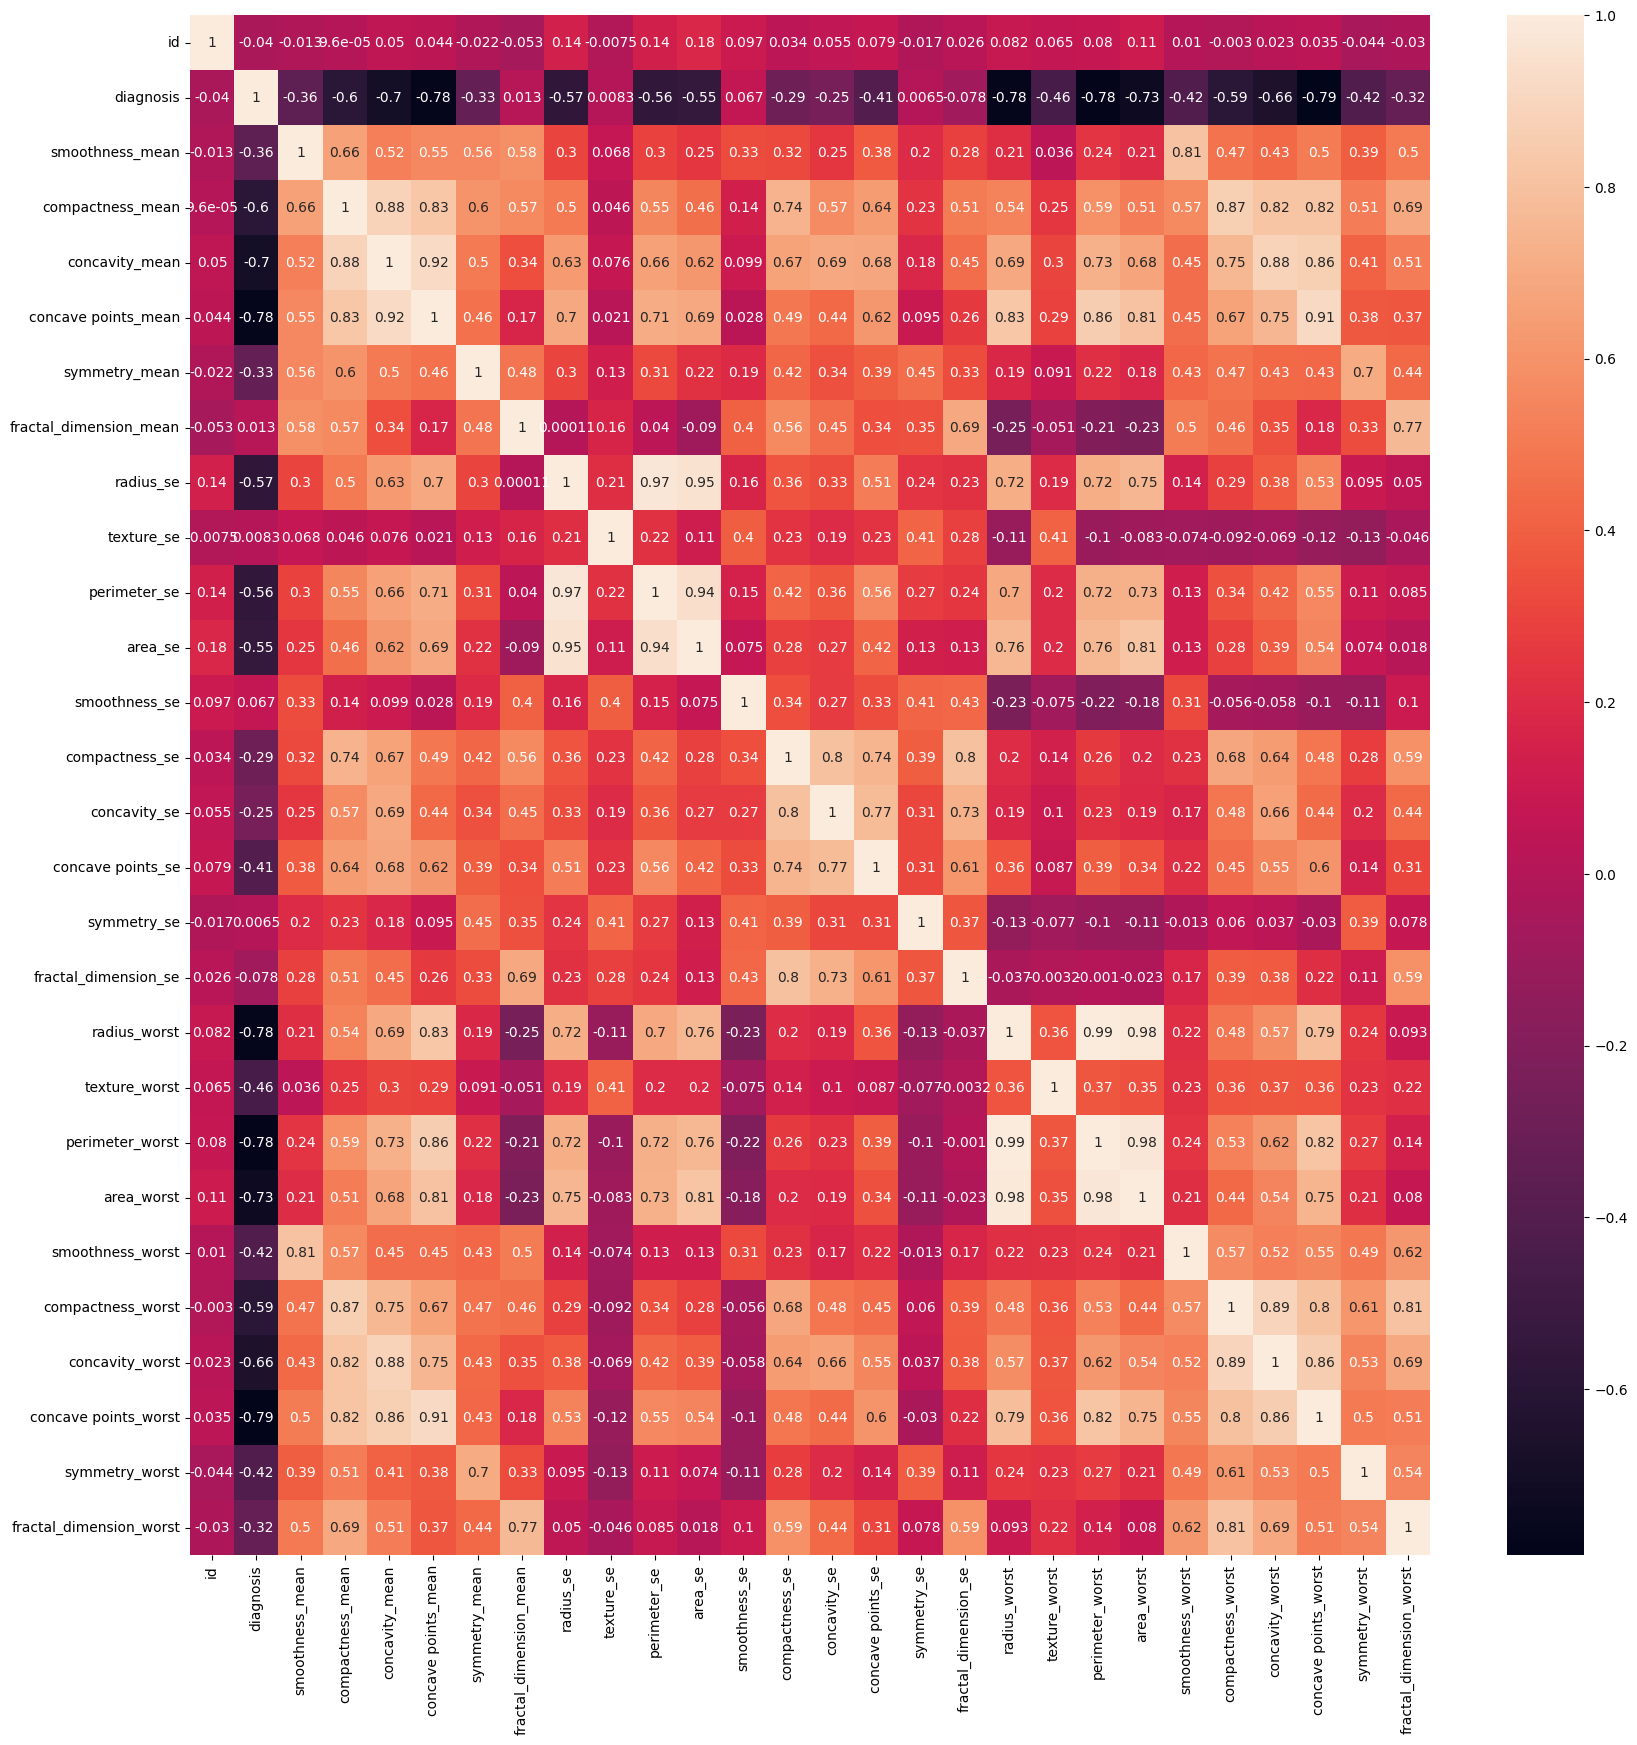

In [15]:
#Eliminamos algunas variables con muy alta correlacion con otras variables
df=df.drop(['radius_mean','texture_mean','perimeter_mean','area_mean'],axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True,);

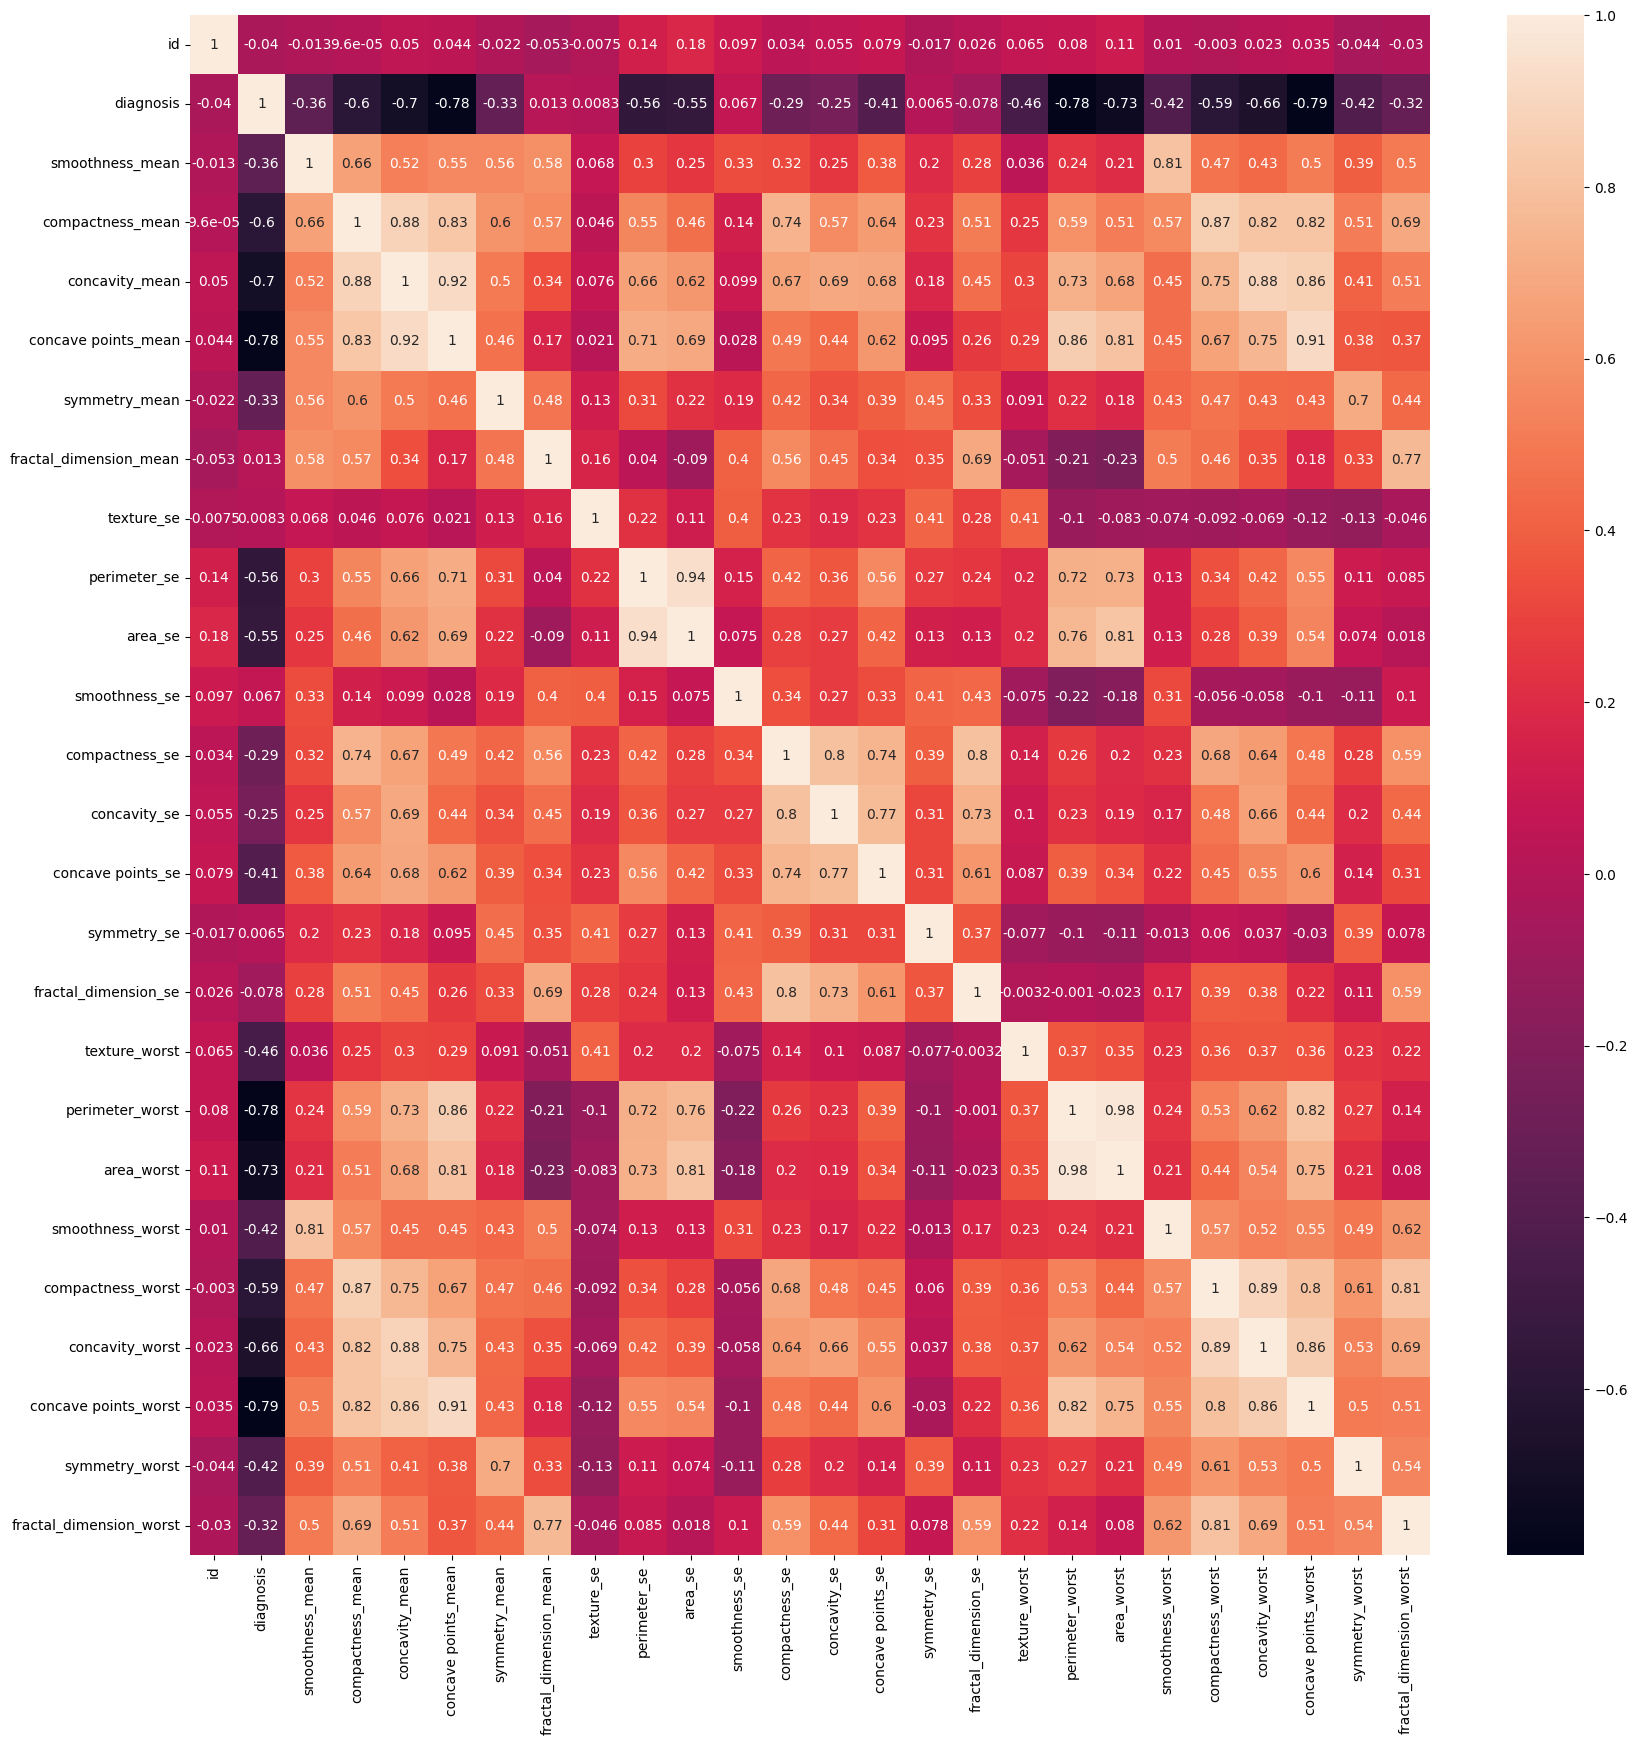

In [16]:
#Seguimos eliminando variables con alta correlacion para eliminar ruido
df=df.drop(['radius_worst','radius_se'],axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

Hacemos un primer barrido de modelos

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pickle

In [18]:
X= df.drop('diagnosis', axis=1)
y= df['diagnosis']

In [19]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
pipe = Pipeline(steps=[
    ('classifier', LinearRegression())
])

logistic_params = {
    'classifier': [LogisticRegression()],
}

random_forest_params = {
    'classifier': [RandomForestClassifier()],
}
extra_trees = {
    'classifier': [ExtraTreesClassifier()],
}

ada_param = {
    'classifier': [AdaBoostClassifier()],
}

gbc_param = {
    'classifier': [GradientBoostingClassifier()],
}

xgb_param = {
    'classifier': [XGBClassifier()],
}

KNC_param = {
    'classifier': [KNeighborsClassifier()],
}

search_space = [
    logistic_params,
    random_forest_params,
    extra_trees,
    ada_param,
    gbc_param,
    xgb_param,
    KNC_param
]

clf = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  n_jobs= -1,
                  cv = 10)

clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('classifier', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()]},
                         {'classifier': [RandomForestClassifier()]},
                         {'classifier': [ExtraTreesClassifier()]},
                         {'classifier': [AdaBoostClassifier()]},
                         {'classifier': [GradientBoostingClassifier()]},
                         {'classifier': [XGBClassifier(base_score=Non...
                                                       interaction_constraints=None,
                                                       learning_rate=None,
                                                       max_bin=None,
                                                       max_cat_threshold=None,
                                                       max_cat_to_onehot=None,
                                                       max_delta_step=None,
                                                       max_depth=None,
                                                       max_leaves=None,
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       multi_strategy=None,
                                                       n_estimators=None,
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       random_state=None, ...)]},
                         {'classifier': [KNeighborsClassifier()]}])

In [21]:
print(clf.best_estimator_)
print(clf.best_score_)
print(clf.best_params_)

Pipeline(steps=[('classifier', ExtraTreesClassifier())])
0.9670048309178745
{'classifier': ExtraTreesClassifier()}


In [22]:
rfe = RandomForestClassifier()

params = {"n_estimators": [50, 100, 150, 200, 300],
          "max_depth": [5,7,9],
          "random_state": [42]}

rfe_et = GridSearchCV(estimator=rfe,
                      param_grid=params,
                      n_jobs=-1,
                      cv=10,
                      scoring="f1")

rfe_et.fit(X_train, y_train)
rfe_et.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=200, random_state=42)

In [23]:
rfe_fin=RandomForestClassifier(max_depth=9,n_estimators=200,random_state=42)
rfe_fin.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, n_estimators=200, random_state=42)

In [24]:
predictions = rfe_fin.predict(X_test)
rf_score= f1_score(y_test,predictions)
rfe_acc= accuracy_score(y_test,predictions)
print(rf_score)
print(rfe_acc)

0.9722222222222222
0.9649122807017544


In [25]:
et = ExtraTreesClassifier()

params = {"n_estimators": [50, 100, 150, 200, 300],
          "max_depth": [5,7,9],
          "random_state": [42]}

et_et = GridSearchCV(estimator=et,
                      param_grid=params,
                      n_jobs=-1,
                      cv=10,
                      scoring="f1")

et_et.fit(X_train, y_train)
et_et.best_estimator_

ExtraTreesClassifier(max_depth=9, n_estimators=50, random_state=42)

In [26]:
et_fin= ExtraTreesClassifier(max_depth=9, n_estimators=50, random_state=42)
et_fin.fit(X_train,y_train)
predictions = et_fin.predict(X_test)
et_score=f1_score(y_test,predictions)
et_acc= accuracy_score(y_test,predictions)


In [27]:
gbc = GradientBoostingClassifier()

params = {"n_estimators": [50, 100, 150, 200, 300],
          "max_depth": [5,7,9],
          "random_state": [42]}

gbc_et = GridSearchCV(estimator=rfe,
                      param_grid=params,
                      n_jobs=-1,
                      cv=10,
                      scoring="f1")

gbc_et.fit(X_train, y_train)
gbc_et.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=200, random_state=42)

In [28]:
gbc_fin= GradientBoostingClassifier(max_depth=9,n_estimators=200,random_state=42)
gbc_fin.fit(X_train,y_train)
predictions = gbc_fin.predict(X_test)
gbc_score= f1_score(y_test,predictions)
gbc_acc=accuracy_score(y_test,predictions)


In [29]:
ada = AdaBoostClassifier()

params = {"n_estimators": [50, 100, 150, 200, 300],
          "learning_rate": [1,1.5,2,2.5],
          "random_state": [42]}

ada_et = GridSearchCV(estimator=ada,
                      param_grid=params,
                      n_jobs=-1,
                      cv=10,
                      scoring="f1")

ada_et.fit(X_train, y_train)
ada_et.best_estimator_

AdaBoostClassifier(learning_rate=1.5, n_estimators=150, random_state=42)

In [30]:
ada_fin= AdaBoostClassifier(learning_rate=1.5,n_estimators=150,random_state=42)
ada_fin.fit(X_train,y_train)
predictions = ada_fin.predict(X_test)
ada_score= f1_score(y_test,predictions)
ada_acc=accuracy_score(y_test,predictions)


In [31]:
knc = KNeighborsClassifier()

params = {"n_neighbors":[5,7,9,11]}

knc_et = GridSearchCV(estimator=knc,
                      param_grid=params,
                      n_jobs=-1,
                      cv=10,
                      scoring="f1")

knc_et.fit(X_train, y_train)
knc_et.best_estimator_

KNeighborsClassifier()

In [32]:
knc_fin= KNeighborsClassifier()
knc_fin.fit(X_train,y_train)
predictions = knc_fin.predict(X_test)
knc_score= f1_score(y_test,predictions)
knc_acc= accuracy_score(y_test,predictions)


In [33]:
xgb = XGBClassifier()

params = {"n_estimators": [50, 100, 150, 200, 300],
          "max_depth": [5,7,9],
          "random_state": [42]}

gbc_et = GridSearchCV(estimator=xgb,
                      param_grid=params,
                      n_jobs=-1,
                      cv=10,
                      scoring="f1")

gbc_et.fit(X_train, y_train)
gbc_et.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [34]:
knc_fin=XGBClassifier(max_depth=5,n_estimators=100,random_state=42)
knc_fin.fit(X_train,y_train)
predictions = knc_fin.predict(X_test)
xbc_score= f1_score(y_test,predictions)
xbc_acc=accuracy_score(y_test,predictions)


In [35]:
#voting
from sklearn.ensemble import VotingClassifier
rfc = RandomForestClassifier(max_depth=9,n_estimators=200,random_state=42)
etc= ExtraTreesClassifier(max_depth=9, n_estimators=50, random_state=42)
ada= AdaBoostClassifier(learning_rate=1.5,n_estimators=150,random_state=42)
gbc= GradientBoostingClassifier(max_depth=9,n_estimators=200,random_state=42)
xgb= XGBClassifier(max_depth=5,n_estimators=100,random_state=42)
knc= KNeighborsClassifier()
estimators = [('rfc', rfc), 
                ('etc', etc), 
                ('ada', ada),
                ('gbc', gbc),   
                ("xgb", xgb),
                ('knc', knc)]
voting_clf = VotingClassifier(estimators=estimators)
voting_clf.fit(X_train, y_train)
predictions = voting_clf.predict(X_test)
voting_score= f1_score(y_test,predictions)
voting_acc= accuracy_score(y_test,predictions)

In [36]:
scores_dict={'Randomforest':rf_score,
             'ExtraTrees':et_score,
             'Gradientboosting':gbc_score,
             'Adaboost':ada_score,
             'Kneigbors':knc_score,
             'XGB':xbc_score,
             'voting':voting_score}
df_score = pd.DataFrame(list(scores_dict.items()), columns=['Modelo', 'f1_score'])
df_score['Accuracy'] = [rfe_acc,et_acc,gbc_acc,ada_acc,knc_acc,xbc_acc,voting_acc]
#df_score.set_index('Modelo', inplace=True)
df_score = df_score.sort_values(by='Accuracy', ascending=False)
df_score

,Modelo,f1_score,Accuracy
1,ExtraTrees,0.979021,0.973684
0,Randomforest,0.972222,0.964912
3,Adaboost,0.972222,0.964912
6,voting,0.971831,0.964912
5,XGB,0.965035,0.956140
2,Gradientboosting,0.943662,0.929825
4,Kneigbors,0.810458,0.745614


In [37]:
et_fin= ExtraTreesClassifier(max_depth=9, n_estimators=50, random_state=42)
et_fin.fit(X_train,y_train)
predictions = et_fin.predict(X_test)
et_score=f1_score(y_test,predictions)
et_acc= accuracy_score(y_test,predictions)
c_matrix = confusion_matrix(y_test, predictions)

In [38]:
#Guardamos el modelo
with open('final_model.pkl', 'wb') as archivo:
    pickle.dump(clf, archivo)


In [39]:
feature_importances= et_fin.feature_importances_

In [40]:
feature_importance_df = pd.DataFrame({'Columna': X.columns, 'Importancia': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False).reset_index()
feature_importance_df = feature_importance_df.drop('index',axis=1)
feature_importance_df


,Columna,Importancia
0,perimeter_worst,0.177804
1,concave points_mean,0.137702
2,concave points_worst,0.134133
3,area_worst,0.105492
4,concavity_worst,0.081791
5,concavity_mean,0.053964
6,area_se,0.044418
7,compactness_mean,0.043709
8,perimeter_se,0.030840
9,compactness_worst,0.029370


In [41]:
print(c_matrix)

[[41  2]
 [ 1 70]]


<Axes: >

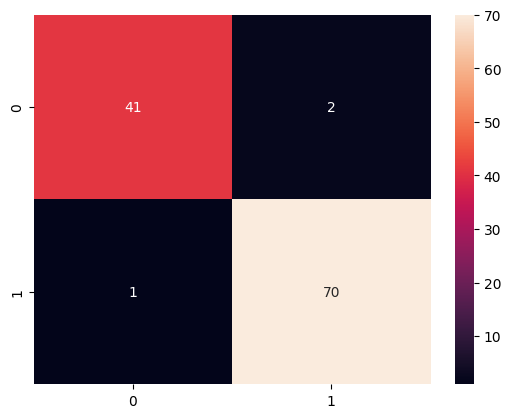

In [44]:
sns.heatmap(c_matrix, annot=True)

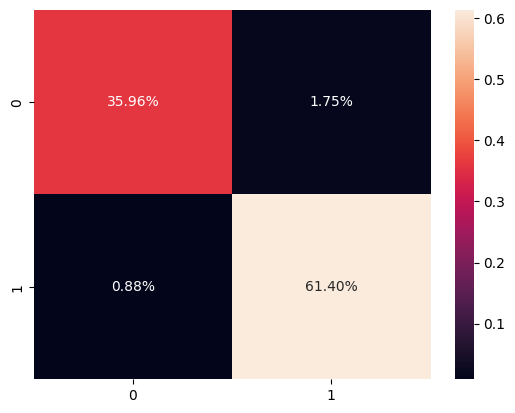

In [43]:
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%');